In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../input/usarrests/USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.index=df.iloc[:,0]

In [4]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [5]:
df= df.iloc[:,1:5]

In [6]:
df.head(3)

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


In [7]:
df.index.name = None

In [8]:
df.head(2)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5


In [9]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


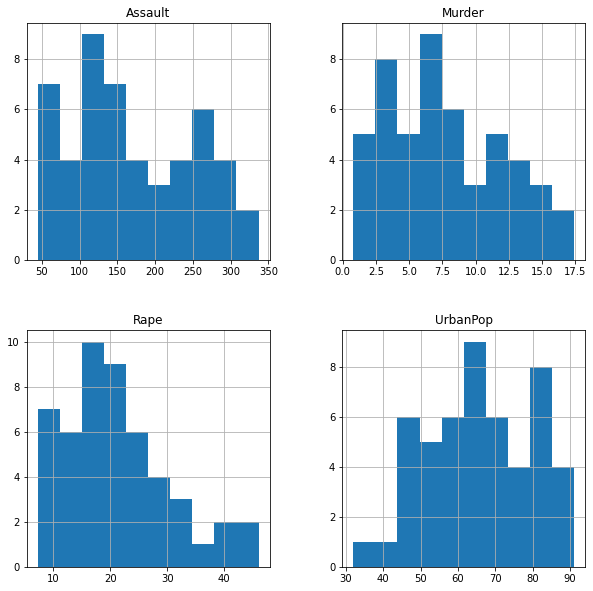

In [12]:
df.hist(figsize=(10,10));

In [13]:
#Assault has 3 peaks. We wonder that which situations constitutes these peaks? 
#This question's answers will be segmentations...

In [14]:
#K-Means Model and Visualizations

In [15]:
#set the model

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
#important parameters
#n_clusters

In [18]:
#Fit the model

In [19]:
kfit=kmeans.fit(df)

In [20]:
kfit.n_clusters

4

In [21]:
kfit.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [22]:
df.shape

(50, 4)

In [23]:
kfit.labels_  #clusters labels

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [24]:
#Visualization 2_dimensional

In [25]:
kfit=KMeans(n_clusters=2).fit(df)

In [26]:
clustersnames=kfit.labels_

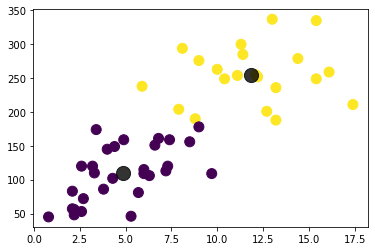

In [27]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,1], c=clustersnames, s=100, cmap="viridis");
centers=kfit.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.8);

In [28]:
#Visualization 3_dimensional

In [29]:
from mpl_toolkits.mplot3d import Axes3D

In [30]:
kfit=KMeans(n_clusters=3).fit(df)
clusters= kfit.labels_
centers=kfit.cluster_centers_

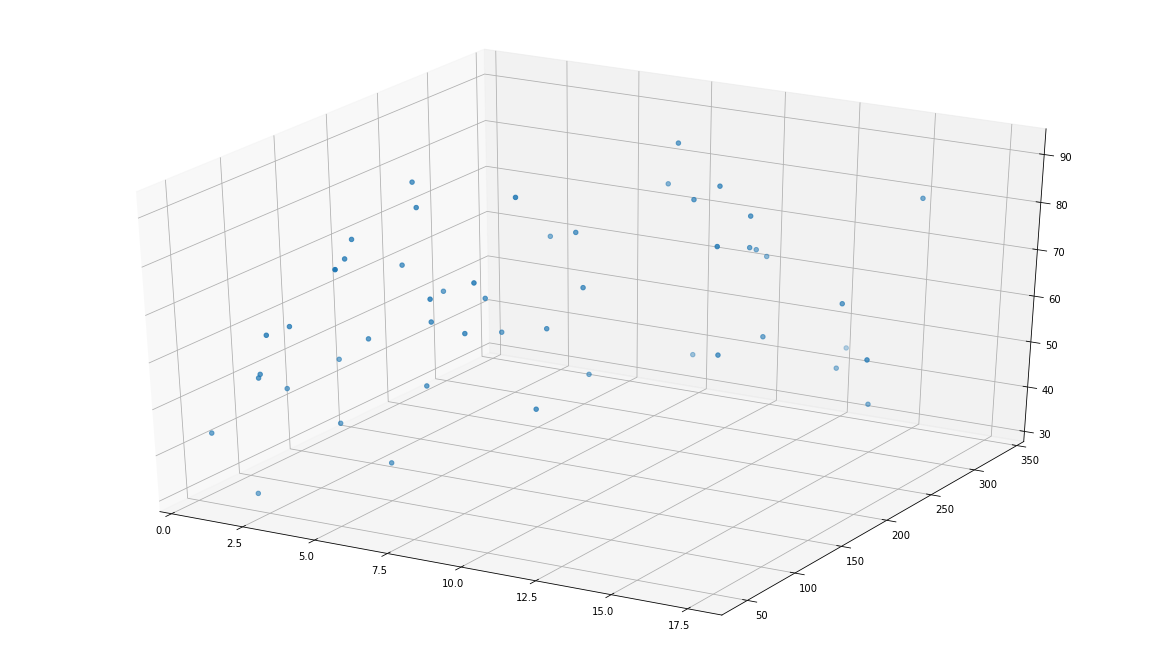

In [31]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

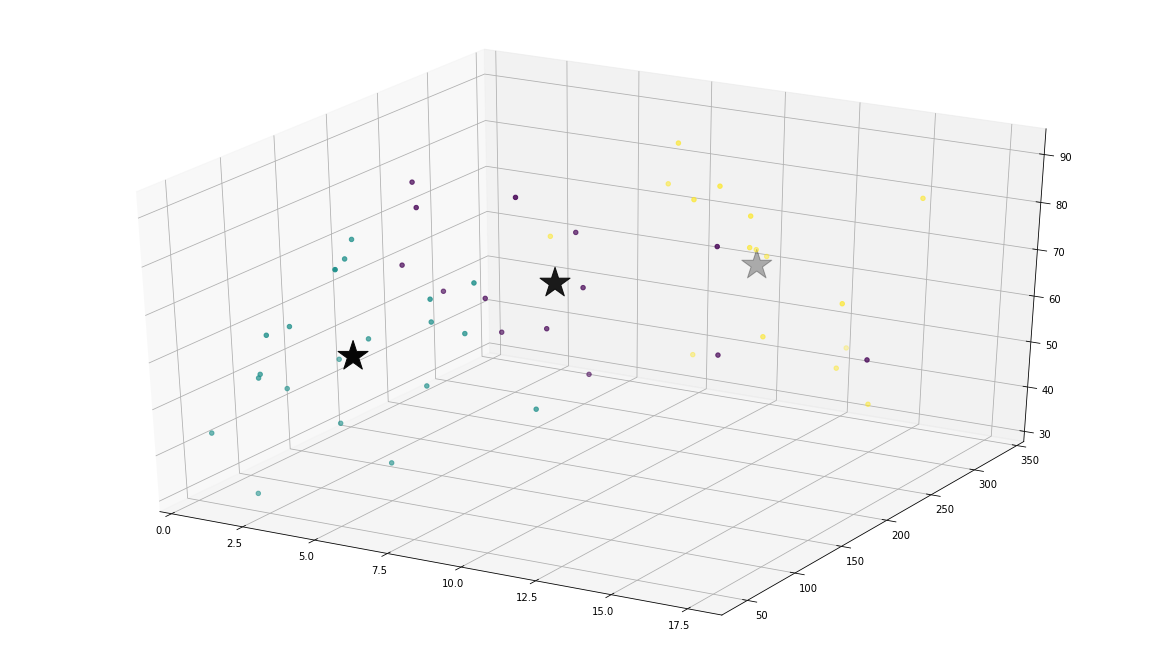

In [32]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=clusters)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

In [33]:
#clusters and observations

In [34]:
kfit=KMeans(n_clusters=3).fit(df)
clusters= kfit.labels_
pd.DataFrame({"States": df.index, "Clusters": clusters})[0:10]

,States,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [35]:
df["cluster numbers"]=clusters
df.head()

,Murder,Assault,UrbanPop,Rape,cluster numbers
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [36]:
df["cluster numbers"]=clusters+1
df.head()

,Murder,Assault,UrbanPop,Rape,cluster numbers
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2


In [37]:
#We tried k=2 and k=3, till here.
#But what is the optimum k?
#We want to maximize similarity btw clusters, minimize similarity within clusters
#we will calculate SSD

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


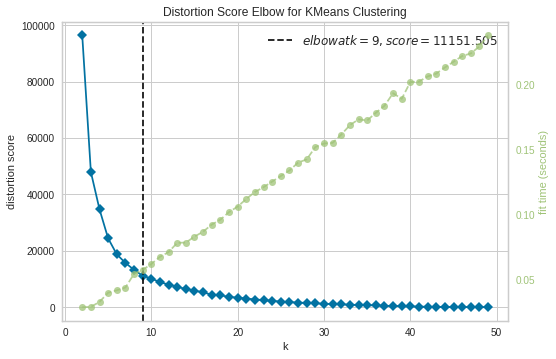

In [38]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()  

In [39]:
#if we want to segment the data, the number of segmentation varies based on the line of business.
#In general, number of segmentation range is 1:5. 
# In this example, 3 is better than 2. However there isn't so much differences btw 4-5-6,so 4 is more preferable.

# we want min distortion score also

In [40]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

In [42]:
pd.DataFrame({"States" : df.index, "Clusters": clusters})[0:10]

,States,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,3
4,California,1
5,Colorado,3
6,Connecticut,2
7,Delaware,1
8,Florida,1
9,Georgia,3
